In [6]:
import json
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from agent.dqn_agent import DQNAgent
from torchsummary import summary
from agent.networks import MLP, CNN
import numpy as np

In [8]:
cartpole_Q = MLP(state_dim=4, action_dim=2)
cartpole_Q_target = MLP(state_dim=4, action_dim=2)
cartpole_agent = DQNAgent(Q=cartpole_Q, Q_target=cartpole_Q_target, num_actions=2)
summary(cartpole_agent.Q, (1, 4))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 400]           2,000
            Linear-2               [-1, 1, 400]         160,400
            Linear-3                 [-1, 1, 2]             802
Total params: 163,202
Trainable params: 163,202
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.62
Estimated Total Size (MB): 0.63
----------------------------------------------------------------


In [11]:
carracing_Q = CNN()
carracing_Q_target = CNN()
carracing_agent = DQNAgent(Q=carracing_Q, Q_target=carracing_Q_target, num_actions=5)
summary(carracing_agent.Q, (1, 96, 96))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 23, 23]             832
              ReLU-2           [-1, 32, 23, 23]               0
           Dropout-3           [-1, 32, 23, 23]               0
            Conv2d-4           [-1, 64, 11, 11]          18,496
              ReLU-5           [-1, 64, 11, 11]               0
           Dropout-6           [-1, 64, 11, 11]               0
           Flatten-7                 [-1, 7744]               0
            Linear-8                  [-1, 256]       1,982,720
              ReLU-9                  [-1, 256]               0
           Linear-10                    [-1, 4]           1,028
Total params: 2,003,076
Trainable params: 2,003,076
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.04
Forward/backward pass size (MB): 0.63
Params size (MB): 7.64
Estimat

In [167]:
def read_summary(path):
    dqn_train = tf.compat.v1.train.summary_iterator(path)

    episode_rewards = []
    j = 20
    for i, event in enumerate(dqn_train):
        for value in event.summary.value:
            if value.tag == 'episode_reward':
                episode_rewards.append(value.simple_value)

        
    return episode_rewards

cartpole_path = 'tensorboard/train/cartpole-20220506-152718/events.out.tfevents.1651843638.Jakes-MacBook-Pro.local.69903.0'
carracing_path = 'tensorboard/train/carracing-20220507-110247/events.out.tfevents.1651914167.Jakes-MacBook-Pro.local.83256.0'

cartpole_reward = read_summary(cartpole_path)
carracing_reward = read_summary(carracing_path)

In [176]:
cartpole_valid_reward = cartpole_reward[1::21]
carracing_valid_reward = carracing_reward[1::21]
cartpole_train_reward = cartpole_reward
del cartpole_train_reward[1::21]
carracing_train_reward = carracing_reward
del carracing_train_reward[1::21]

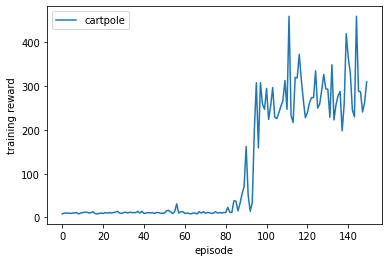

In [177]:
episodes = np.arange(len(cartpole_train_reward))

fig = plt.subplot()
fig.plot(episodes, cartpole_train_reward, label='cartpole')
fig.legend()
plt.xlabel('episode')
plt.ylabel('training reward')
plt.show()

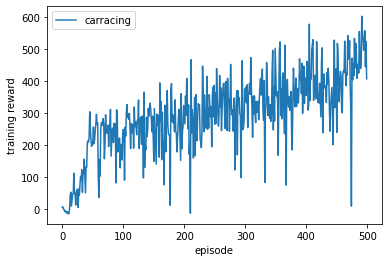

In [178]:
episodes = np.arange(len(carracing_train_reward))

fig = plt.subplot()
fig.plot(episodes, carracing_train_reward, label='carracing')
fig.legend()
plt.xlabel('episode')
plt.ylabel('training reward')
plt.show()

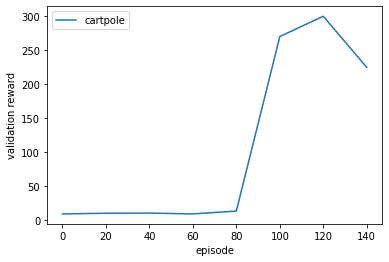

In [179]:
episodes = np.arange(start=0, stop=150, step=20)

fig = plt.subplot()
fig.plot(episodes, cartpole_valid_reward, label='cartpole')
fig.legend()
plt.xlabel('episode')
plt.ylabel('validation reward')
plt.show()

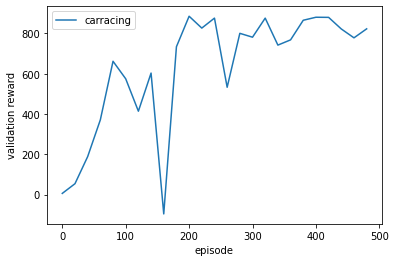

In [175]:
episodes = np.arange(start=0, stop=500, step=20)

fig = plt.subplot()
fig.plot(episodes, carracing_valid_reward, label='carracing')
fig.legend()
plt.xlabel('episode')
plt.ylabel('validation reward')
plt.show()

In [183]:
cartpole_test_file = open('results/cartpole_results_dqn-20220507-135757.json')
cartpole_test_rewards = json.load(cartpole_test_file)['episode_rewards']

carracing_test_file = open('results/carracing_results_dqn-20220507-175145.json') # FIXME
carracing_test_rewards = json.load(carracing_test_file)['episode_rewards']

expert_test_file = open('results/results_manually-20220507-143924.json')
expert_test_rewards = json.load(expert_test_file)['episode_rewards']

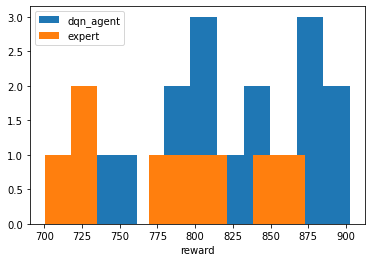

In [185]:
fig = plt.subplot()
fig.hist(carracing_test_rewards, label='dqn_agent')
fig.hist(expert_test_rewards, label='expert')
fig.legend()
plt.xlabel('reward')
plt.show()

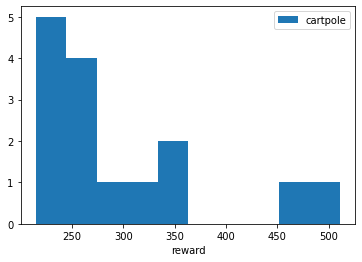

In [182]:
fig = plt.subplot()
fig.hist(cartpole_test_rewards, label='cartpole')
fig.legend()
plt.xlabel('reward')
plt.show()